<h1> Exploratory Analysis of </h2>
  - Overall Dataset MBE/MAE/SD
  - Mapbox Scatter plots
  - Introductory time series plots
  - Matplotlib image heatplots

In [38]:
#01 - Import and consolidate the results for analysis
import pandas as pd
import numpy as np

df = pd.read_csv("results_test.csv", encoding="utf-8")
df['latlon'] = df['lat'].astype(str) + "|" + df['lon'].astype(str)
df

,key,start_date,lat,lon,xgboost_tmp2m_pred_zscore,tmp2m_daily_mean,tmp2m_daily_std,tmp2m_zscore,tmp2m,xgboost_tmp2m_pred,err,phys,phys_err,latlon
0,2019-10-01|27.25|261.75,2019-10-01,27.25,261.75,1.028229,22.870967,2.045002,-0.014837,22.840626,24.973697,2.133071,17.826860,-5.013765,27.25|261.75
1,2019-10-01|27.25|277.75,2019-10-01,27.25,277.75,0.602405,23.886820,1.095936,3.186881,27.379438,24.547017,2.832422,19.966705,-7.412733,27.25|277.75
2,2019-10-01|27.25|279.75,2019-10-01,27.25,279.75,0.285290,24.353932,0.992701,2.720873,27.054945,24.637140,2.417805,21.474310,-5.580635,27.25|279.75
3,2019-10-01|29.25|259.75,2019-10-01,29.25,259.75,0.677093,21.986072,2.040617,-0.325284,21.322292,23.367759,2.045467,14.625558,-6.696734,29.25|259.75
4,2019-10-01|29.25|261.75,2019-10-01,29.25,261.75,1.178884,21.320222,2.163752,-0.391424,20.473276,23.871034,3.397758,14.187637,-6.285639,29.25|261.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26393,2020-07-28|47.25|265.75,2020-07-28,47.25,265.75,-0.024450,18.610993,1.730824,0.599149,19.648014,18.568675,1.079339,8.760571,-10.887443,47.25|265.75
26394,2020-07-28|47.25|267.75,2020-07-28,47.25,267.75,0.352289,17.596814,1.729239,0.772011,18.931807,18.206006,0.725801,8.714696,-10.217111,47.25|267.75
26395,2020-07-28|47.25|269.75,2020-07-28,47.25,269.75,0.450236,17.672248,1.595401,0.765863,18.894106,18.390556,0.503550,8.962629,-9.931477,47.25|269.75
26396,2020-07-28|47.25|271.75,2020-07-28,47.25,271.75,0.269793,17.870772,1.474947,1.511164,20.099659,18.268703,1.830956,9.780845,-10.318814,47.25|271.75


In [12]:
df.lon.nunique()

28

In [3]:
#02 - Dataset Characteristics
print("Unique Dates: " + str(df.start_date.nunique()))
print("First Dat: " + df.start_date.min())
print("Last Date: " + df.start_date.max())
print("Unique Locations: " + str(df.latlon.nunique()))

Unique Dates: 134
First Dat: 2019-01-01
Last Date: 2021-07-20
Unique Locations: 197


In [4]:
#03 - High level summary statistics
phys_mbe = round(df['phys_err'].mean(),3)
print('phys mbe = ' + str(phys_mbe))
phys_mae = round(df['phys_err'].abs().mean(),3)
print('phys mae = ' + str(phys_mae))
phys_sd = round(df['phys_err'].std(),3)
print('phys sd = ' + str(phys_sd))

ml_mbe = round(df['err'].mean(),3)
print('ml mbe = ' + str(ml_mbe))
ml_mae = round(df['err'].abs().mean(),3)
print('ml mae = ' + str(ml_mae))
ml_sd = round(df['err'].std(),3)
print('ml sd = ' + str(ml_sd))

phys mbe = -3.779
phys mae = 8.279
phys sd = 10.335
ml mbe = 1.988
ml mae = 1.988
ml sd = 1.937


In [6]:
#04 - Condense results by lat lon
unique_latlon = df.latlon.unique()
uniquell = pd.DataFrame(unique_latlon, columns = ['latlon'])
uniquell['ml_mbe'] = ""; uniquell['ml_mae'] = ""; uniquell['ml_sd'] = ""
uniquell['phys_mbe'] = ""; uniquell['phys_mae'] = ""; uniquell['phys_sd'] = ""

for ind, row in uniquell.iterrows():
    ll = row['latlon']
    df_subset = df[df['latlon']==ll]

    ml_mbe = df_subset['err'].mean()
    ml_mae = df_subset['err'].abs().mean()
    ml_sd = df_subset['err'].std()
    uniquell.loc[uniquell['latlon']==ll,'ml_mbe'] = ml_mbe
    uniquell.loc[uniquell['latlon']==ll,'ml_mae'] = ml_mae
    uniquell.loc[uniquell['latlon']==ll,'ml_sd'] = ml_sd    
    phys_mbe = df_subset['phys_err'].mean()
    phys_mae = df_subset['phys_err'].abs().mean()
    phys_sd = df_subset['phys_err'].std()
    uniquell.loc[uniquell['latlon']==ll,'phys_mbe'] = phys_mbe
    uniquell.loc[uniquell['latlon']==ll,'phys_mae'] = phys_mae
    uniquell.loc[uniquell['latlon']==ll,'phys_sd'] = phys_sd
uniquell['lat'] = uniquell['latlon'].str.split('|').str[0].astype(float)
uniquell['lon'] = uniquell['latlon'].str.split('|').str[1].astype(float)
uniquell['ml_outperforms'] = uniquell['ml_mae'] < uniquell['phys_mae']
uniquell['phys_outperforms'] = uniquell['phys_mae'] < uniquell['ml_mae']
uniquell['ml_mbe'] = uniquell['ml_mbe'].astype(float); uniquell['ml_mae'] = uniquell['ml_mae'].astype(float); uniquell['ml_sd'] = uniquell['ml_sd'].astype(float)
uniquell['phys_mbe'] = uniquell['phys_mbe'].astype(float); uniquell['phys_mae'] = uniquell['phys_mae'].astype(float); uniquell['phys_sd'] = uniquell['phys_sd'].astype(float)
uniquell
#uniquell.to_csv('./results_byll.csv')
#uniquell.to_hdf('results_byll.h5', key='uniquell', mode='w')

,latlon,ml_mbe,ml_mae,ml_sd,phys_mbe,phys_mae,phys_sd,lat,lon,ml_outperforms,phys_outperforms
0,27.25|261.75,1.411512,1.411512,1.459878,-2.548818,5.347528,6.653903,27.25,261.75,True,False
1,27.25|277.75,1.233993,1.233993,1.119246,-2.271220,4.196729,4.796151,27.25,277.75,True,False
2,27.25|279.75,1.198907,1.198907,1.146496,-1.419927,3.483729,4.158915,27.25,279.75,True,False
3,29.25|259.75,1.463632,1.463632,1.468805,-4.439074,7.105868,7.951840,29.25,259.75,True,False
4,29.25|261.75,1.696690,1.696690,1.719548,-3.768113,6.525271,7.609261,29.25,261.75,True,False
...,...,...,...,...,...,...,...,...,...,...,...
192,47.25|265.75,2.776868,2.776868,2.476570,-3.252181,10.577301,13.418391,47.25,265.75,True,False
193,47.25|267.75,2.483786,2.483786,2.276213,-2.962738,10.073353,13.049879,47.25,267.75,True,False
194,47.25|269.75,2.549160,2.549160,2.099996,-3.665645,9.617920,11.855126,47.25,269.75,True,False
195,47.25|271.75,2.296741,2.296741,1.787659,-4.196594,9.110361,10.769689,47.25,271.75,True,False


In [7]:
#05 - Condense results by start date
unique_sd = df.start_date.unique()
uniquesd = pd.DataFrame(unique_sd, columns = ['start_date'])
uniquesd['ml_mbe'] = ""; uniquesd['ml_mae'] = ""; uniquesd['ml_sd'] = ""
uniquesd['phys_mbe'] = ""; uniquesd['phys_mae'] = ""; uniquesd['phys_sd'] = ""

for ind, row in uniquesd.iterrows():
    sd = row['start_date']
    df_subset = df[df['start_date']==sd]

    ml_mbe = df_subset['err'].mean()
    ml_mae = df_subset['err'].abs().mean()
    ml_sd = df_subset['err'].std()
    uniquesd.loc[uniquesd['start_date']==sd,'ml_mbe'] = ml_mbe
    uniquesd.loc[uniquesd['start_date']==sd,'ml_mae'] = ml_mae
    uniquesd.loc[uniquesd['start_date']==sd,'ml_sd'] = ml_sd
    phys_mbe = df_subset['phys_err'].mean()
    phys_mae = df_subset['phys_err'].abs().mean()
    phys_sd = df_subset['phys_err'].std()
    uniquesd.loc[uniquesd['start_date']==sd,'phys_mbe'] = phys_mbe
    uniquesd.loc[uniquesd['start_date']==sd,'phys_mae'] = phys_mae
    uniquesd.loc[uniquesd['start_date']==sd,'phys_sd'] = phys_sd

uniquesd['ml_outperforms'] = uniquesd['ml_mae'] < uniquesd['phys_mae']
uniquesd['phys_outperforms'] = uniquesd['phys_mae'] < uniquesd['ml_mae']
uniquesd = uniquesd.sort_values(by="start_date")
uniquesd
#uniquesd.to_csv('./results_bysd.csv')
#uniquesd.to_hdf('results_bysd.h5', key='uniquesd', mode='w')

,start_date,ml_mbe,ml_mae,ml_sd,phys_mbe,phys_mae,phys_sd,ml_outperforms,phys_outperforms
66,2019-01-01,1.695858,1.695858,1.792921,2.038148,2.921977,3.920364,True,False
67,2019-01-08,2.155811,2.155811,2.362155,2.044086,3.244955,4.461135,True,False
68,2019-01-15,3.392222,3.392222,3.202141,2.408851,4.403226,5.446806,True,False
69,2019-01-22,4.651939,4.651939,3.778545,2.478019,5.155162,6.172842,True,False
70,2019-01-29,4.320264,4.320264,3.605777,0.565806,2.945867,3.41975,False,True
...,...,...,...,...,...,...,...,...,...
128,2021-06-22,1.458838,1.458838,0.931676,-11.312552,11.312552,3.183594,True,False
129,2021-06-29,1.125577,1.125577,0.951431,-11.580278,11.580278,3.100487,True,False
97,2021-07-06,0.827254,0.827254,0.631423,-22.062991,22.062991,3.921975,True,False
98,2021-07-13,0.791664,0.791664,0.647192,-21.632578,21.632578,3.674078,True,False


In [8]:
#06 - Import plotting libraries and other dependencies to be able to plots  (Pi) to follow
#import geoplot as gplt
#import geoplot.crs as gcrs
#import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#import cartopy.crs as ccrs
from matplotlib.cm import get_cmap
#from cartopy.feature import NaturalEarthFeature
import plotly
import plotly_express as px
#from osgeo import gdal as gd
import argparse
import tables
import pdb
from scipy import spatial

In [9]:
!pip install plotly_express
!pip install kaleido

<AxesSubplot:xlabel='lon', ylabel='latlon'>

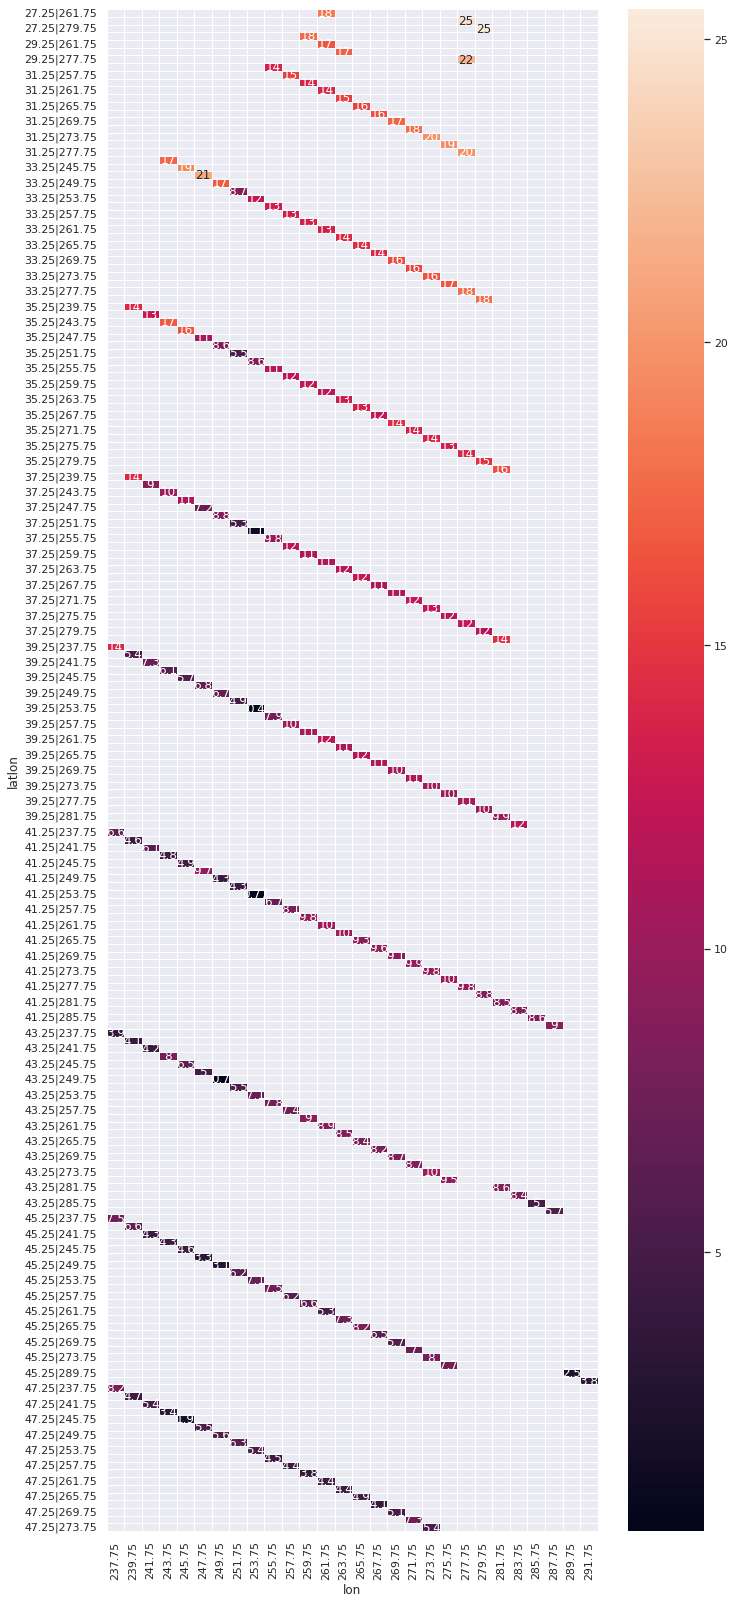

In [26]:
#P1 - Plotting ground truth 2m forecast or ML (xgboost) 2m forecast or Phys(cfs) 2m forecast on map for a particular date
#https://www.nws.noaa.gov/ost/CTB/Documents/CFS_Strategy_12July2012.pdf and 
#https://www.cpc.ncep.noaa.gov/products/CFSv2/CFSv2seasonal.shtml
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import plotly
mapbox_token = 'pk.eyJ1IjoibXVra2F2aWxsaSIsImEiOiJja3JoOG1yYm02ZWRrMnBtZmc3cTlycHQwIn0.OOg5KGUGMDM-t7vf3ez1FQ'
px.set_mapbox_access_token(mapbox_token)

#edit date
date = '2020-10-13'
#Which forecast to view
column = 'err' #'tmp2m' 'xgboost_tmp2m_pred' or 'phys'
df_subset = df[df['start_date']==date]
#range_list = [-15,35]
range_list = [df_subset[column].min(),df_subset[column].max()]


df_pivot = pd.pivot_table(df_subset, index='latlon', columns='lon', values='tmp2m', aggfunc=np.sum)
f, ax = plt.subplots(figsize=(11, 28))
#sns.heatmap(df_pivot, cmap="YlGnBu")
sns.heatmap(df_pivot, annot=True, linewidths=.5, ax=ax)

/home/pranav/.local/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=15,18 m=197 fp=33.040934 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


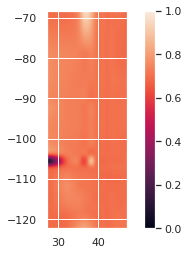

AttributeError: 'AxesImage' object has no attribute 'savefig'

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.interpolate import interp2d

#edit date
date = '2019-10-01'
#Which forecast to view
df_subset = df[df['start_date']==date]
parameter = 'tmp2m' #'tmp2m' 'xgboost_tmp2m_pred' or 'phys'

x_list = np.array(df_subset.lat)
z_list = np.array(df_subset.lon-360)
C_I_list = np.array(df_subset['tmp2m'])

#   f will be a function with two arguments (x and z coordinates),
# but those can be array_like structures too, in which case the
# result will be a matrix representing the values in the grid 
# specified by those arguments
f = interp2d(x_list,z_list,C_I_list,kind="linear")

x_coords = np.arange(min(x_list),max(x_list)+1)
z_coords = np.arange(min(z_list),max(z_list)+1)
c_i = f(x_coords,z_coords)

fig = plt.imshow(c_i,
           extent=[min(x_list),max(x_list),min(z_list),max(z_list)],
           origin="lower", interpolation='bicubic')

# Show the positions of the sample points, just to have some reference
fig.axes.set_autoscale_on(False)
plt.scatter(x_list,z_list,400,facecolors='none')
plt.colorbar()
plt.show()
fig.savefig('figs/'+parameter+'_heatplot.png', dpi = 300)

In [13]:
#P2 - By space: Where does ML outperform Phys and Phys outperform ML
#edit date

fig=px.scatter_mapbox(uniquell, lat='lat', lon='lon', color ='ml_outperforms',
                      color_continuous_scale='jet', range_color=[0,1],zoom=2.8, title="Where does Vayuh.ai outperform",
                      width=800, height=400,
                      labels={"ml_outperforms": "Vayuh.ai outperforms"})
fig.update_layout(mapbox_style="dark", mapbox_accesstoken=mapbox_token,
                    margin=dict(l=20, r=20, t=50, b=20))
fig.show()
fig.write_image("figs/MLoutperform.png")


In [26]:
#P2 - By space: Where does ML outperform Phys and Phys outperform ML
parameter = 'phys_sd'
#range_par = [-15,15]
range_par = [uniquell[parameter].min(),uniquell[parameter].max()]
fig=px.scatter_mapbox(uniquell, lat='lat', lon='lon', color =parameter,
                      color_continuous_scale='jet', range_color=range_par,zoom=2.8, 
                      width=800, height=400, labels={"phys_sd": "Physics SD"})
fig.update_layout(mapbox_style="dark", mapbox_accesstoken=mapbox_token,
                    margin=dict(l=20, r=20, t=20, b=20))
fig.show()
fig.write_image("figs/" + parameter + ".png")

In [87]:
datesaxis = pd.to_datetime(uniquesd['start_date'])
d = pd.DataFrame(datesaxis, columns = ['start_date'])
d.set_index('start_date', inplace=True)
#d['start_date'] = d['start_date'].apply(lambda x: pd.to_datetime(x).to_pydatetime())
d

""
start_date
2019-01-01
2019-01-08
2019-01-15
2019-01-22
2019-01-29
...
2021-06-22
2021-06-29
2021-07-06


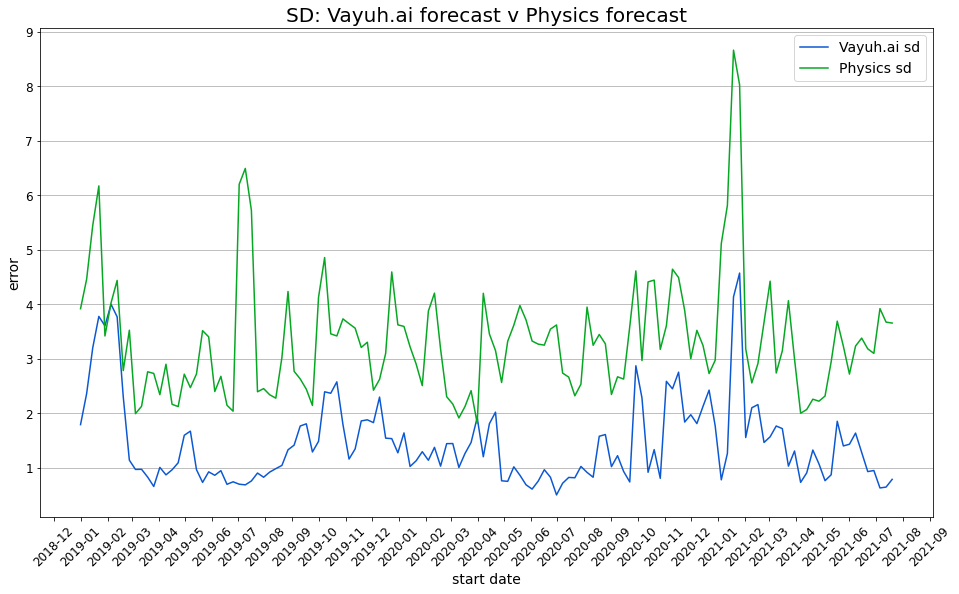

In [32]:
#P3a - Plotting using matplotlib
#Vayuh blue: #0C58D3 (12, 88, 211); #Vayuh green: #06A723 (6, 167, 35)
#Vayuh light blue: #CFE2F3 (207, 226, 243), light blue 3; #Vayuh grey: #D9D9D9 (217, 217, 217), light grey 1
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

parameter = 'sd'

fig = plt.figure(figsize=(16,9))
ax = plt.axes()
datesaxis = pd.to_datetime(uniquesd['start_date'])
ax.grid(axis='y')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("SD: Vayuh.ai forecast v Physics forecast", fontsize=20)
plt.xlabel("start date", fontsize=14)
plt.ylabel("error", fontsize=14)
ax.xaxis.set_major_locator(mdates.MonthLocator()) #set ticks every week
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) #set major ticks format
plt.plot(datesaxis, uniquesd['ml_'+parameter], color = '#0C58D3', label='Vayuh.ai '+parameter)
plt.plot(datesaxis, uniquesd['phys_'+parameter], color = '#06A723', label = 'Physics '+parameter)
plt.legend(prop={"size":14})
fig.savefig('figs/'+parameter+'plot.png', dpi = 300)

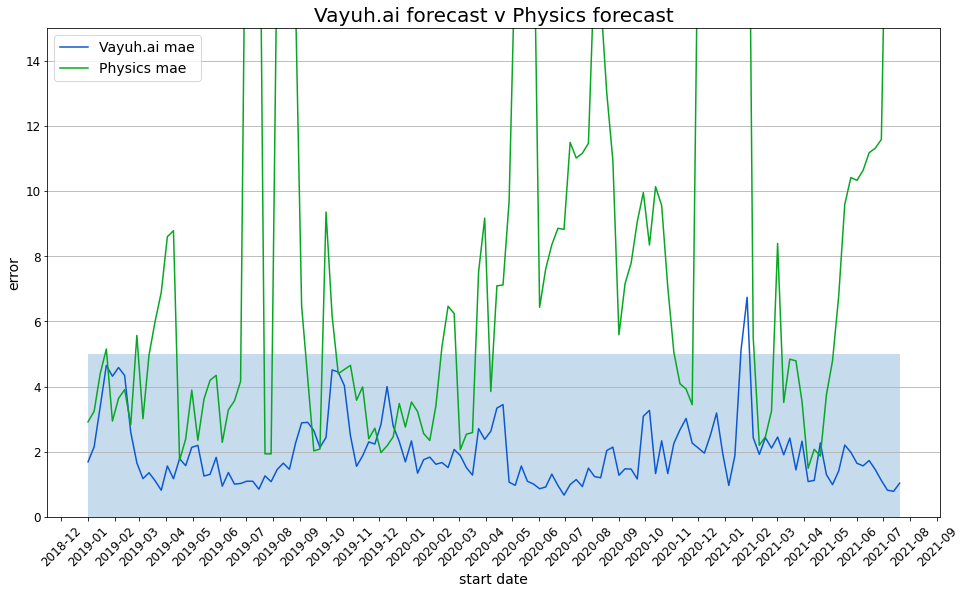

In [28]:
#P3a - Plotting using matplotlib
#Vayuh blue: #0C58D3 (12, 88, 211); #Vayuh green: #06A723 (6, 167, 35)
#Vayuh light blue: #CFE2F3 (207, 226, 243), light blue 3; #Vayuh grey: #D9D9D9 (217, 217, 217), light grey 1
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

parameter = 'mae'

fig = plt.figure(figsize=(16,9))
ax = plt.axes()
datesaxis = pd.to_datetime(uniquesd['start_date'])
d = np.array(datesaxis)
ax.grid(axis='y')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Vayuh.ai forecast v Physics forecast", fontsize=20)
plt.xlabel("start date", fontsize=14)
plt.ylabel("error", fontsize=14)
plt.ylim(0,15)
ax.xaxis.set_major_locator(mdates.MonthLocator()) #set ticks every week
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) #set major ticks format
plt.plot(datesaxis, uniquesd['ml_'+parameter], color = '#0C58D3', label='Vayuh.ai '+parameter)
ax.fill_between(uniquesd['start_date'], 0, 5, alpha=0.25)
plt.plot(datesaxis, uniquesd['phys_'+parameter], color = '#06A723', label = 'Physics '+parameter)
plt.legend(prop={"size":14})
fig.savefig('figs/'+parameter+'plot.png', dpi = 300)

In [34]:
#P7 - By extreme events: Texas cold wave (06 Feb to 22 Feb 2021) (14 day differences)
texascoldwave = df[(df['start_date']>='2021-01-23') & (df['start_date']<='2021-02-28')]
texaslatlon = ['35.25|257.75', '35.25|259.75', '33.25|257.75', '33.25|259.75', '31.25|257.75', '31.25|259.75', '29.25|259.75', '31.25|255.75',\
    '33.25|261.75', '33.25|263.75', '33.25|265.75', '31.25|261.75', '31.25|263.75', '31.25|265.75', '29.25|261.75', '29.25|263.75', '27.25|261.75']
texascoldwave = texascoldwave[texascoldwave['latlon'].isin(texaslatlon)]
texascoldwave = texascoldwave.sort_values(by="start_date")
texascoldwave

#High level stats
phys_mbe = texascoldwave['phys_err'].mean()
print('phys mbe = ' + str(phys_mbe))
phys_mae = texascoldwave['phys_err'].abs().mean()
print('phys mae = ' + str(phys_mae))
phys_sd = texascoldwave['phys_err'].std()
print('phys sd = ' + str(phys_sd))
ml_mbe = texascoldwave['err'].mean()
print('ml mbe = ' + str(ml_mbe))
ml_sd = texascoldwave['err'].std()
print('ml sd = ' + str(ml_sd))
ml_mae = texascoldwave['err'].abs().mean()
print('ml mae = ' + str(ml_mae))

#Reduce by lat lon
texascoldwave_latlon = texascoldwave.latlon.unique()
texascoldwavell = pd.DataFrame(texascoldwave_latlon, columns = ['latlon'])
texascoldwavell['ml_mbe'] = ""; texascoldwavell['ml_mae'] = ""; texascoldwavell['ml_sd'] = ""
texascoldwavell['phys_mbe'] = ""; texascoldwavell['phys_mae'] = ""; texascoldwavell['phys_sd'] = ""

for ind, row in texascoldwavell.iterrows():
    ll = row['latlon']
    texascoldwave_subset = texascoldwave[texascoldwave['latlon']==ll]

    ml_mbe = texascoldwave_subset['err'].mean()
    ml_mae = texascoldwave_subset['err'].abs().mean()
    ml_sd = texascoldwave_subset['err'].std()
    texascoldwavell.loc[texascoldwavell['latlon']==ll,'ml_mbe'] = ml_mbe
    texascoldwavell.loc[texascoldwavell['latlon']==ll,'ml_mae'] = ml_mae
    texascoldwavell.loc[texascoldwavell['latlon']==ll,'ml_sd'] = ml_sd    
    phys_mbe = texascoldwave_subset['phys_err'].mean()
    phys_mae = texascoldwave_subset['phys_err'].abs().mean()
    phys_sd = texascoldwave_subset['phys_err'].std()
    texascoldwavell.loc[texascoldwavell['latlon']==ll,'phys_mbe'] = phys_mbe
    texascoldwavell.loc[texascoldwavell['latlon']==ll,'phys_mae'] = phys_mae
    texascoldwavell.loc[texascoldwavell['latlon']==ll,'phys_sd'] = phys_sd
texascoldwavell['lat'] = texascoldwavell['latlon'].str.split('|').str[0].astype(float)
texascoldwavell['lon'] = texascoldwavell['latlon'].str.split('|').str[1].astype(float)
texascoldwavell['ml_outperforms'] = texascoldwavell['ml_mae'] < texascoldwavell['phys_mae']
texascoldwavell['phys_outperforms'] = texascoldwavell['phys_mae'] < texascoldwavell['ml_mae']
texascoldwavell['ml_mbe'] = texascoldwavell['ml_mbe'].astype(float); texascoldwavell['ml_mae'] = texascoldwavell['ml_mae'].astype(float); texascoldwavell['ml_sd'] = texascoldwavell['ml_sd'].astype(float)
texascoldwavell['phys_mbe'] = texascoldwavell['phys_mbe'].astype(float); texascoldwavell['phys_mae'] = texascoldwavell['phys_mae'].astype(float); texascoldwavell['phys_sd'] = texascoldwavell['phys_sd'].astype(float)
texascoldwavell

#Plot
parameter = 'phys_mae'
range_par = [texascoldwavell[parameter].min(),texascoldwavell[parameter].max()]
fig=px.scatter_mapbox(texascoldwavell, lat='lat', lon='lon', color =parameter,
                      color_continuous_scale='jet', range_color=range_par,zoom=2.8, 
                      width=800, height=400, labels={"phys_mae": "Physics MAE"})
fig.update_layout(mapbox_style="dark", mapbox_accesstoken=mapbox_token,
                    margin=dict(l=20, r=20, t=20, b=20))
fig.show()
fig.write_image("figs/" + 'texascoldwave2021/' + parameter + ".png")

phys mbe = 5.9225588546956285
phys mae = 8.068208147585391
phys sd = 11.850045183635165
ml mbe = 3.90355466850066
ml sd = 4.433453711124069
ml mae = 3.90355466850066


In [42]:
#P7 - By extreme events: Oregon heat wave (28 Jun to 15 Jul 2021) (14 day differences)
oregonheatwave = df[(df['start_date']>='2021-06-14') & (df['start_date']<='2021-07-01')]
oregonlatlon = ['45.25|237.75', '45.25|239.75', '45.25|241.75', '43.25|237.75', '43.25|239.75', '43.25|241.75']
oregonheatwave = oregonheatwave[oregonheatwave['latlon'].isin(oregonlatlon)]
oregonheatwave = oregonheatwave.sort_values(by="start_date")
oregonheatwave

#High level stats
phys_mbe = oregonheatwave['phys_err'].mean()
print('phys mbe = ' + str(phys_mbe))
phys_mae = oregonheatwave['phys_err'].abs().mean()
print('phys mae = ' + str(phys_mae))
phys_sd = oregonheatwave['phys_err'].std()
print('phys sd = ' + str(phys_sd))
ml_mbe = oregonheatwave['err'].mean()
print('ml mbe = ' + str(ml_mbe))
ml_sd = oregonheatwave['err'].std()
print('ml sd = ' + str(ml_sd))
ml_mae = oregonheatwave['err'].abs().mean()
print('ml mae = ' + str(ml_mae))

#Reduce by lat lon
oregonheatwave_latlon = oregonheatwave.latlon.unique()
oregonheatwavell = pd.DataFrame(oregonheatwave, columns = ['latlon'])
oregonheatwavell['ml_mbe'] = ""; oregonheatwavell['ml_mae'] = ""; oregonheatwavell['ml_sd'] = ""
oregonheatwavell['phys_mbe'] = ""; oregonheatwavell['phys_mae'] = ""; oregonheatwavell['phys_sd'] = ""

for ind, row in oregonheatwavell.iterrows():
    ll = row['latlon']
    oregonheatwave_subset = oregonheatwave[oregonheatwave['latlon']==ll]

    ml_mbe = oregonheatwave_subset['err'].mean()
    ml_mae = oregonheatwave_subset['err'].abs().mean()
    ml_sd = oregonheatwave_subset['err'].std()
    oregonheatwavell.loc[oregonheatwavell['latlon']==ll,'ml_mbe'] = ml_mbe
    oregonheatwavell.loc[oregonheatwavell['latlon']==ll,'ml_mae'] = ml_mae
    oregonheatwavell.loc[oregonheatwavell['latlon']==ll,'ml_sd'] = ml_sd    
    phys_mbe = oregonheatwave_subset['phys_err'].mean()
    phys_mae = oregonheatwave_subset['phys_err'].abs().mean()
    phys_sd = oregonheatwave_subset['phys_err'].std()
    oregonheatwavell.loc[oregonheatwavell['latlon']==ll,'phys_mbe'] = phys_mbe
    oregonheatwavell.loc[oregonheatwavell['latlon']==ll,'phys_mae'] = phys_mae
    oregonheatwavell.loc[oregonheatwavell['latlon']==ll,'phys_sd'] = phys_sd
oregonheatwavell['lat'] = oregonheatwavell['latlon'].str.split('|').str[0].astype(float)
oregonheatwavell['lon'] = oregonheatwavell['latlon'].str.split('|').str[1].astype(float)
oregonheatwavell['ml_outperforms'] = oregonheatwavell['ml_mae'] < oregonheatwavell['phys_mae']
oregonheatwavell['phys_outperforms'] = oregonheatwavell['phys_mae'] < oregonheatwavell['ml_mae']
oregonheatwavell['ml_mbe'] = oregonheatwavell['ml_mbe'].astype(float); oregonheatwavell['ml_mae'] = oregonheatwavell['ml_mae'].astype(float); oregonheatwavell['ml_sd'] = oregonheatwavell['ml_sd'].astype(float)
oregonheatwavell['phys_mbe'] = oregonheatwavell['phys_mbe'].astype(float); oregonheatwavell['phys_mae'] = oregonheatwavell['phys_mae'].astype(float); oregonheatwavell['phys_sd'] = oregonheatwavell['phys_sd'].astype(float)
oregonheatwavell

#Plot
parameter = 'ml_mae'
range_par = [0,15]
#range_par = [oregonheatwavell[parameter].min(),oregonheatwavell[parameter].max()]
fig=px.scatter_mapbox(oregonheatwavell, lat='lat', lon='lon', color =parameter,
                      color_continuous_scale='jet', range_color=range_par,zoom=2.8, 
                      width=800, height=400, labels={"ml_mae": "Vayuh.ai MAE"})
fig.update_layout(mapbox_style="dark", mapbox_accesstoken=mapbox_token,
                    margin=dict(l=20, r=20, t=20, b=20))
fig.show()
fig.write_image("figs/" + 'oregonheatwave2021/' + parameter + ".png")

phys mbe = -12.196632570690578
phys mae = 12.196632570690578
phys sd = 2.3849106751148836
ml mbe = 2.0053543620218406
ml sd = 1.4600818042108457
ml mae = 2.0053543620218406


In [38]:
#general performance around heatwaves
heatwave = df[(df['tmp2m']>34)]
print(heatwave.shape)
#High level stats
phys_mbe = heatwave['phys_err'].mean()
print('phys mbe = ' + str(phys_mbe))
phys_mae = heatwave['phys_err'].abs().mean()
print('phys mae = ' + str(phys_mae))
phys_sd = heatwave['phys_err'].std()
print('phys sd = ' + str(phys_sd))
ml_mbe = heatwave['err'].mean()
print('ml mbe = ' + str(ml_mbe))
ml_sd = heatwave['err'].std()
print('ml sd = ' + str(ml_sd))
ml_mae = heatwave['err'].abs().mean()
print('ml mae = ' + str(ml_mae))

#Reduce by lat lon
heatwave_latlon = heatwave.latlon.unique()
heatwavell = pd.DataFrame(heatwave, columns = ['latlon'])
heatwavell['ml_mbe'] = ""; heatwavell['ml_mae'] = ""; heatwavell['ml_sd'] = ""
heatwavell['phys_mbe'] = ""; heatwavell['phys_mae'] = ""; heatwavell['phys_sd'] = ""

for ind, row in heatwavell.iterrows():
    ll = row['latlon']
    heatwave_subset = heatwave[heatwave['latlon']==ll]
    ml_mbe = heatwave_subset['err'].mean()
    ml_mae = heatwave_subset['err'].abs().mean()
    ml_sd = heatwave_subset['err'].std()
    heatwavell.loc[heatwavell['latlon']==ll,'ml_mbe'] = ml_mbe
    heatwavell.loc[heatwavell['latlon']==ll,'ml_mae'] = ml_mae
    heatwavell.loc[heatwavell['latlon']==ll,'ml_sd'] = ml_sd    
    phys_mbe = heatwave_subset['phys_err'].mean()
    phys_mae = heatwave_subset['phys_err'].abs().mean()
    phys_sd = heatwave_subset['phys_err'].std()
    heatwavell.loc[heatwavell['latlon']==ll,'phys_mbe'] = phys_mbe
    heatwavell.loc[heatwavell['latlon']==ll,'phys_mae'] = phys_mae
    heatwavell.loc[heatwavell['latlon']==ll,'phys_sd'] = phys_sd
heatwavell['lat'] = heatwavell['latlon'].str.split('|').str[0].astype(float)
heatwavell['lon'] = heatwavell['latlon'].str.split('|').str[1].astype(float)
heatwavell['ml_outperforms'] = heatwavell['ml_mae'] < heatwavell['phys_mae']
heatwavell['phys_outperforms'] = heatwavell['phys_mae'] < heatwavell['ml_mae']
heatwavell['ml_mbe'] = heatwavell['ml_mbe'].astype(float); heatwavell['ml_mae'] = heatwavell['ml_mae'].astype(float); heatwavell['ml_sd'] = heatwavell['ml_sd'].astype(float)
heatwavell['phys_mbe'] = heatwavell['phys_mbe'].astype(float); heatwavell['phys_mae'] = heatwavell['phys_mae'].astype(float); heatwavell['phys_sd'] = heatwavell['phys_sd'].astype(float)
heatwavell

#Plot
parameter = 'phys_mae'
range_par = [0,15]
#range_par = [heatwavell[parameter].min(),heatwavell[parameter].max()]
fig=px.scatter_mapbox(heatwavell, lat='lat', lon='lon', color =parameter,
                      color_continuous_scale='jet', range_color=range_par,zoom=4, 
                      width=800, height=400, labels={"phys_mae": "Physics MAE"})
fig.update_layout(mapbox_style="dark", mapbox_accesstoken=mapbox_token,
                    margin=dict(l=20, r=20, t=20, b=20))
fig.show()
fig.write_image("figs/" + 'heatwaves/' + parameter + ".png")



(47, 14)
phys mbe = -15.28161356296945
phys mae = 15.28161356296945
phys sd = 6.699463002248057
ml mbe = 1.5248046085231703
ml sd = 0.9204587202311445
ml mae = 1.5248046085231703


In [41]:
#general performance around coldwaves
coldwave = df[(df['tmp2m']<-10)]
print(coldwave.shape)
#High level stats
phys_mbe = coldwave['phys_err'].mean()
print('phys mbe = ' + str(phys_mbe))
phys_mae = coldwave['phys_err'].abs().mean()
print('phys mae = ' + str(phys_mae))
phys_sd = coldwave['phys_err'].std()
print('phys sd = ' + str(phys_sd))
ml_mbe = coldwave['err'].mean()
print('ml mbe = ' + str(ml_mbe))
ml_sd = coldwave['err'].std()
print('ml sd = ' + str(ml_sd))
ml_mae = coldwave['err'].abs().mean()
print('ml mae = ' + str(ml_mae))

#Reduce by lat lon
coldwave_latlon = coldwave.latlon.unique()
coldwavell = pd.DataFrame(coldwave, columns = ['latlon'])
coldwavell['ml_mbe'] = ""; coldwavell['ml_mae'] = ""; coldwavell['ml_sd'] = ""
coldwavell['phys_mbe'] = ""; coldwavell['phys_mae'] = ""; coldwavell['phys_sd'] = ""

for ind, row in coldwavell.iterrows():
    ll = row['latlon']
    coldwave_subset = coldwave[coldwave['latlon']==ll]
    ml_mbe = coldwave_subset['err'].mean()
    ml_mae = coldwave_subset['err'].abs().mean()
    ml_sd = coldwave_subset['err'].std()
    coldwavell.loc[coldwavell['latlon']==ll,'ml_mbe'] = ml_mbe
    coldwavell.loc[coldwavell['latlon']==ll,'ml_mae'] = ml_mae
    coldwavell.loc[coldwavell['latlon']==ll,'ml_sd'] = ml_sd 
    phys_mbe = coldwave_subset['phys_err'].mean()
    phys_mae = coldwave_subset['phys_err'].abs().mean()
    phys_sd = coldwave_subset['phys_err'].std()
    coldwavell.loc[coldwavell['latlon']==ll,'phys_mbe'] = phys_mbe
    coldwavell.loc[coldwavell['latlon']==ll,'phys_mae'] = phys_mae
    coldwavell.loc[coldwavell['latlon']==ll,'phys_sd'] = phys_sd
    
coldwavell['lat'] = coldwavell['latlon'].str.split('|').str[0].astype(float)
coldwavell['lon'] = coldwavell['latlon'].str.split('|').str[1].astype(float)
coldwavell['ml_outperforms'] = coldwavell['ml_mae'] < coldwavell['phys_mae']
coldwavell['phys_outperforms'] = coldwavell['phys_mae'] < coldwavell['ml_mae']
coldwavell['ml_mbe'] = coldwavell['ml_mbe'].astype(float); coldwavell['ml_mae'] = coldwavell['ml_mae'].astype(float); coldwavell['ml_sd'] = coldwavell['ml_sd'].astype(float)
coldwavell['phys_mbe'] = coldwavell['phys_mbe'].astype(float); coldwavell['phys_mae'] = coldwavell['phys_mae'].astype(float); coldwavell['phys_sd'] = coldwavell['phys_sd'].astype(float)
coldwavell

#Plot
parameter = 'phys_mae'
range_par = [0,15]
#range_par = [coldwavell[parameter].min(),coldwavell[parameter].max()]
fig=px.scatter_mapbox(coldwavell, lat='lat', lon='lon', color =parameter,
color_continuous_scale='jet', range_color=range_par,zoom=2.8, 
width=800, height=400, labels={"phys_mae": "Physics MAE"})
fig.update_layout(mapbox_style="dark", mapbox_accesstoken=mapbox_token,
margin=dict(l=20, r=20, t=20, b=20))
fig.show()
fig.write_image("figs/" + 'coldwaves/' + parameter + ".png")

(447, 14)
phys mbe = 16.493775200182093
phys mae = 16.817454298528983
phys sd = 13.986081349499175
ml mbe = 7.555469783232671
ml sd = 4.380646221958321
ml mae = 7.555469783232671


In [126]:
#Baselining model error and controlling within bounds (Generalised extreme value analysis, Peak over threshold analysis)
vayuhdates = ['2021-01-12', '2021-02-16', '2021-03-16', '2021-04-13', '2021-05-18', '2021-06-15']
salientdates = ['2021-01-15', '2021-02-15', '2021-03-15', '2021-04-15', '2021-05-15', '2021-06-15']
datemap = {'vayuhdate': vayuhdates, 'salientdate': salientdates}
datemap = pd.DataFrame(datemap)
datemap

,vayuhdate,salientdate
0,2021-01-12,2021-01-15
1,2021-02-16,2021-02-15
2,2021-03-16,2021-03-15
3,2021-04-13,2021-04-15
4,2021-05-18,2021-05-15
5,2021-06-15,2021-06-15


In [ ]:
vayuhdates = ['2021-01-12', '2021-02-16', '2021-03-16', '2021-04-13', '2021-05-18', '2021-06-15']
salientdates = ['2021-01-15', '2021-02-15', '2021-03-15', '2021-04-15', '2021-05-15', '2021-06-15']
datemap = pd.DataFrame([vayuhdates, salientdates], columns=['vayuhdates','salientdates'])
datemap

def getsdate (vdate):
    sdate = datemap[datemap['vayuhdate']==vdate]['salientdate']
    return sdate

vayuh_subset = df[df['start_date'].isin(vayuhdates)]
vayuh_subset['salient_date'] = vayuh_subset['start_date']
vayuh_subset['salient_date'].apply(getsdate, args=vayuh_subset['salient_date'])
vayuh_subset


In [130]:
import xarray as xr
ds01 = xr.open_dataset('./salient/2021-01-15_ai.nc')
ds01

#ds02 = xr.open_dataset('./salient/2021-02-15_ai.nc')
#ds03 = xr.open_dataset('./salient/2021-03-15_ai.nc')
#ds04 = xr.open_dataset('./salient/2021-04-15_ai.nc')
#ds05 = xr.open_dataset('./salient/2021-05-15_ai.nc')
#ds06 = xr.open_dataset('./salient/2021-06-15_ai.nc')

<xarray.Dataset>
Dimensions:          (lead: 4, forecast_date: 1, lat: 65, lon: 120, ensemble: 50, nbnds: 2)
Coordinates:
  * lead             (lead) int64 1 4 7 10
  * forecast_date    (forecast_date) datetime64[ns] 2021-01-15
  * lat              (lat) float32 10.5 11.5 12.5 13.5 ... 71.5 72.5 73.5 74.5
  * lon              (lon) float32 -169.5 -168.5 -167.5 ... -52.5 -51.5 -50.5
Dimensions without coordinates: ensemble, nbnds
Data variables:
    vals_ens         (ensemble, forecast_date, lead, lat, lon) float32 ...
    anom_ens         (ensemble, forecast_date, lead, lat, lon) float32 ...
    anom             (forecast_date, lead, lat, lon) float32 ...
    vals             (forecast_date, lead, lat, lon) float32 ...
    forecast_period  (forecast_date, lead, nbnds) datetime64[ns] ...
    lead_bnds        (lead, nbnds) int64 ...
    prob             (forecast_date, lead, lat, lon) float32 ...
Attributes:
    clim_period:  ['1990-01-01', '2019-12-31']

In [123]:
datemap = {'vayuhdate': vayuhdates,
        'salientdate': salientdates}
datemap = pd.DataFrame(datemap)

for ind, row in vayuh_subset.iterrows():
    sdate = datemap[datemap['vayuhdate']==row['start_date']]['salientdate']
    ds01 = xr.open_dataset('./salient/'+str(sdate)+'_ai.nc')
    ds01 = ds01['vals_ens']
    da = ds01.sel(lead=1, lat=row['lat'], lon=row['lon']-360, method='nearest')
    print(da.mean())
'''          
    

"\nfor ind, row in vayuh_subset.iterrows():\n    print(row['start_date'])\n    sdate = datemap[datemap['vayuhdate']==row['start_date']]['salientdate']\n    ds01 = xr.open_dataset('./salient/'+str(sdate)+'_ai.nc')\n    ds01 = ds01['vals_ens']\n    da = ds01.sel(lead=1, lat=row['lat'], lon=row['lon']-360, method='nearest')\n    print(da.mean())\n"

In [ ]:
def getphys(filename, rowlat, rowlon):
    ds = xr.open_dataset(filename) #time, lon, lat, height
    da = ds['2t'] - 273.15
    da = da.sel(lat=rowlat, lon=rowlon, method='nearest')
    da = da[56:112]
    phys = float(da.mean())
    return phys